# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Task 1: Load the Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# load Data
retail_df = pd.read_excel("Online Retail.xlsx")
print(retail_df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [25]:
retail_df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [24]:
#Check the data type for each features
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The dataset is made of **541909 rows** and **8 columns**. There are some missing values in the **Description** and **CustomerID** column where it only includes 540455 and 406829 non-null values.

In [50]:
#Check if there is duplicated value, and remove if there is any
retail_df.duplicated().sum()

5848

In [51]:
# Remove exact duplicate rows
retail_df = retail_df.drop_duplicates()

In [23]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


There are negative values in **Quantity** and **UnitPrice** column. This could indicate a return or cancellation in sales.

In [47]:
# Create new feature "Sales"
retail_df["Sales"] = retail_df["Quantity"] * retail_df["UnitPrice"]

# Extract Month and Day
retail_df["Month"] = retail_df["InvoiceDate"].dt.to_period("M")
retail_df["DayOfWeek"] = retail_df["InvoiceDate"].dt.day_name()

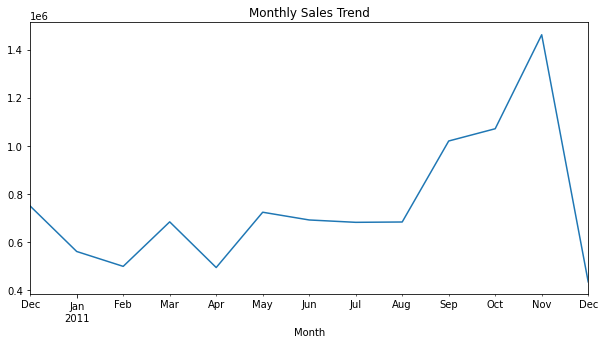

In [29]:
# Monthly Sales Trends
monthly_sales = retail_df.groupby("Month")["Sales"].sum()
monthly_sales.plot(kind="line", figsize=(10,5), title="Monthly Sales Trend")
plt.show()

The monthly sales trend shows that peak occur around **November 2011**, which likely driven by holiday shopping for Christmas and New Year. The lowest sales appear in the summer months, possibly due to seasonal demand changes.

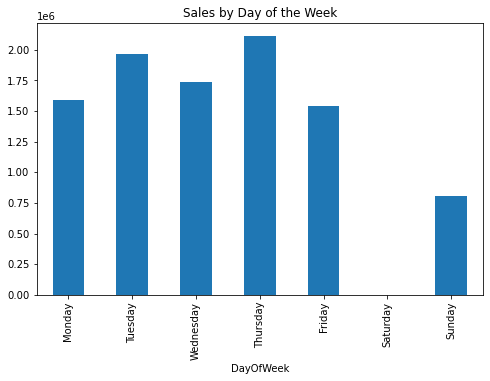

In [48]:
# busiest day of the week
weekday_sales = retail_df.groupby("DayOfWeek")["Sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
weekday_sales.plot(kind="bar", figsize=(8,5), title="Sales by Day of the Week")

Sales tend to peak on **Thursday and Tuesday**, indicating strong mid-week purchasing behavior. In contrast, it shows lower activity in weekends, which may suggest that customers are mostly business buyers that likes to shop online than casual shoppers.

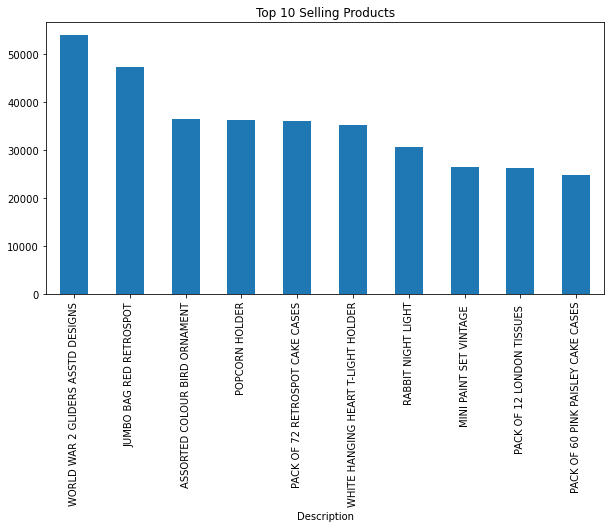

In [33]:
#Top selling product based on quantity sold
top_products = retail_df.groupby("Description")["Quantity"].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10,5), title = "Top 10 Selling Products")
plt.show()

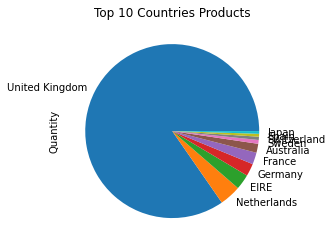

In [53]:
#Top selling countries based on quantity sold
top_countries = retail_df.groupby("Country")["Quantity"].sum().nlargest(10)
top_countries.plot(kind='pie', title = "Top 10 Countries Products")
plt.show()

The top-selling product was **'WHITE HANGING HEART T-LIGHT HOLDER'**, reflecting strong demand for home decoration items. Most sales came from the **United Kingdom**, but notable international markets include the Netherlands and Germany.

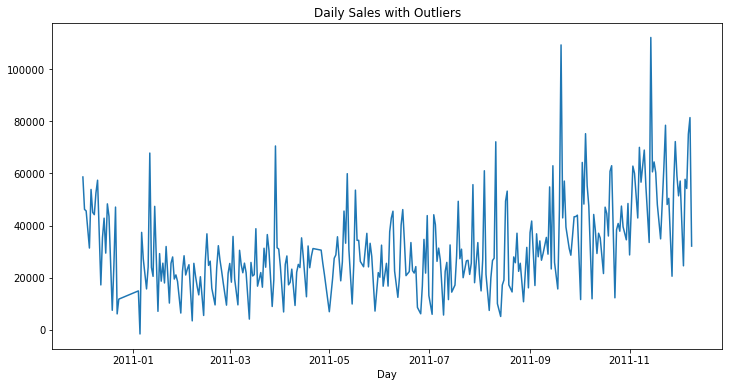

In [38]:
#Identify outliers/anomalies -> discuss the impact
daily_sales = retail_df.groupby("Day")["Sales"].sum()
daily_sales.plot(kind="line", figsize=(12,6), title="Daily Sales with Outliers")
plt.show()

We observed a few spikes in daily sales, which often linked to bulk purchases. These anomalies highlight the importance of monitoring large transacions separately, as the can distort overall sales trends.

From the Retail Sales dataset,
✅ Findings:

- Sales are highly seasonal, peaking in October and November.
- Mid-week (especially Thursday) is the busiest sales period.
- The majority of sales come from the UK, but international sales are growing.
- Top-selling products are gift/home decor, indicating the store’s strength in lifestyle categories.
- Outliers exist due to bulk orders—important to separate wholesale vs. retail analysis.

✅ Recommendations:

1. Holiday Preparation: Stock up and run campaigns ahead of October/November to maximize revenue.

2. Mid-Week Promotions: Leverage busy weekdays by running targeted discounts or new launches on Tuesdays/Thursdays.

3. Expand International Markets: Focus marketing and logistics on Germany and the Netherlands, as they are most potential overseas markets.

4. Product Strategy: Increase visibility and bundles around top gift/home items to boost average order value.

5. Customer Segmentation: Separate retail vs. wholesale buyers for clearer insights and more tailored strategies.